<a href="https://colab.research.google.com/github/AnaghaBaby123/Sentiment-Analysis-with-Tensorflow/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The IMDB review dataset**


In [ ]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)


In [ ]:
print(x_train[0])  #Review is taken as a list of words and thus it is converted to list of tokens
                   #Each Token correspond to each word.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(y_train[0])    # 1 represents positive review and 0 represents negative review.

1


# **Decoding the Review**:

In [ ]:
word_index = imdb.get_word_index()     # get_word_index() function returns dictionary of words and their index values.
text =' '
def decode(review):
  for vals in review:
    for key,value in word_index.items():
      if(vals == value):
        print(key,end=" ")
        break
      else:
        pass

decode(x_train[0])

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

# **Padding the Data:** 
(To make every data instances of same length)

In [ ]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train,value=word_index["the"],maxlen=256,padding='post')  # The word 'the' is added as it is
x_test = pad_sequences(x_test,value=word_index["the"],maxlen=256,padding='post')    # meaningless word

In [ ]:
print(len(x_train[0]))

256


In [ ]:
decode(x_train[0])

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

**One hot Encoding:**
In this method,each word is represented as an entire entitiy and feature.No relationship between words can be obtained.

**Word Embedding:**
In this method,we can find the relationships between the words.The words are mapped with feature set and given with a value (how much they are related to corresponding feature).

***So word embeddings are preferred over one hot encoding in text analysis***

# **Creating and training model**

**GlobalAveragePooling1D layer:** It uses a parser window which moves across the object and pools the data by averaging it (GlobalAveragePooling) or picking max value (GlobalMaxPooling). Padding is essentially required to take the corner cases into the account.

**Embedding layer :**
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Embedding,GlobalAveragePooling1D

model = Sequential([
                    Embedding(10000,16),
                    GlobalAveragePooling1D(),
                    Dense(16,activation='relu'),
                    Dense(1,activation='sigmoid')
])

model.compile(
    loss= "binary_crossentropy",
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [47]:
h = model.fit(
    x_train,y_train,
    epochs = 20,
    validation_split = 0.2

  
)

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0194 - accuracy: 0.9959 - val_loss: 0.0226 - val_accuracy: 0.9962
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0146 - accuracy: 0.9975 - val_loss: 0.0297 - val_accuracy: 0.9922
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0118 - accuracy: 0.9979 - val_loss: 0.0365 - val_accuracy: 0.9894
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0100 - accuracy: 0.9987 - val_loss: 0.0532 - val_accuracy: 0.9824
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0079 - accuracy: 0.9989 - val_loss: 0.0571 - val_accuracy: 0.9804
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0738 - val_accuracy: 0.9740
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0886 - val_accuracy: 0.9714
Epoch 

# **Prediction and evaluation**

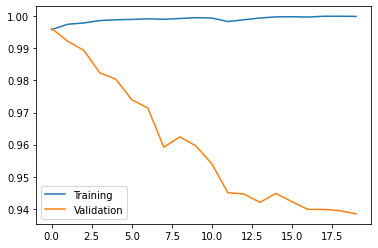

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(20), h.history['accuracy'],label = 'Training')
plt.plot(range(20), h.history['val_accuracy'],label = 'Validation')

plt.legend()
plt.show()

In [53]:
loss,acc = model.evaluate(x_test,y_test,verbose=False)
print("accuracy of model on test data is",acc*100)

accuracy of model on test data is 83.07999968528748


In [110]:
import numpy as np
i=1
p = model.predict(np.expand_dims(x_test[i],axis=0))


print("label:",y_test[i])

if(p[0]>=0.5):
  print("Positive review")
else:
  print("Negative review")

decode(x_test[i])

label: 1
Positive review
is quite br mankind most that quest are chase to being quickly of little it time hell to plot br of something long put are of every place this consequence and of interplay storytelling being nasty not of you warren in is failed club i i of films pay so sequences and film okay uses to received and if time done for room sugar viewer as cartoon of gives to forgettable br be because many these of reflection sugar contained gives it wreck scene to more was two when had find as you another it of themselves probably who interplay storytelling if itself by br about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of wheel got say kong sugar fred close bore there is playing lot of and pan place trilogy of lacks br of their time much this men as on it is telling program br silliness okay and to frustration at corner and she of sequences to political clearly in of drugs keep guy i i was throwing room sugar as it by br 